In [2]:
from ultralytics import YOLO
import os
import cv2

## Extract frames to match the CVAT labels

In [3]:
vid_path = "../data/sample.mp4"
frame2image_output_dir = "../data/YOLO/train/images/"
label_dir = "../data/YOLO/train/labels/"

os.makedirs(frame2image_output_dir, exist_ok=True)

vid = cv2.VideoCapture(vid_path)
frame_count = 0
extract_count = 0

ret, frame = vid.read()
while ret:
    # Check if this frame has an annotation
    frame_name = f"frame_{frame_count:06d}.txt"
    if os.path.exists(os.path.join(label_dir, frame_name)):
        # Save the corresponding image
        image_name = f"frame_{frame_count:06d}.jpg"
        cv2.imwrite(os.path.join(frame2image_output_dir, image_name), frame)
        extract_count += 1
        
    frame_count += 1
    ret, frame = vid.read()

vid.release()
print(f"Extracted {extract_count} frames.")

Extracted 125 frames.


## Model Training

In [3]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')

# Train the model
results = model.train(
    data='../data/YOLO/data.yaml',
    epochs=20
)

Ultralytics 8.3.166  Python-3.12.9 torch-2.7.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../data/YOLO/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning C:\Users\chun\Desktop\_Git\VEnv_CV_NameTagFinder\data\YOLO\train\labels.cache... 126 images, 0 backgrou

val: Fast image access  (ping: 0.00.0 ms, read: 25.13.7 MB/s, size: 255.5 KB)



C:\Users\chun\Desktop\_Git\VEnv_CV_NameTagFinder\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\chun\Desktop\_Git\VEnv_CV_NameTagFinder\data\YOLO\train\labels.cache... 126 images, 0 background
C:\Users\chun\Desktop\_Git\VEnv_CV_NameTagFinder\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      3.023      31.41      1.286         22        640: 100%|██████████| 8/8 [00:41<00:00,  5.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      2.274      10.34     0.9402         17        640: 100%|██████████| 8/8 [00:39<00:00,  4.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<0

                   all        126        126   0.000159     0.0476    8.5e-05   2.11e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      2.442      8.773     0.9639         24        640: 100%|██████████| 8/8 [00:36<00:00,  4.55
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126   0.000635       0.19   0.000404    0.00012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      2.396      7.921     0.8945         22        640: 100%|██████████| 8/8 [00:36<00:00,  4.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<0

                   all        126        126    0.00106      0.317   0.000805   0.000224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      2.146      6.447     0.8993         27        640: 100%|██████████| 8/8 [00:37<00:00,  4.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<0

                   all        126        126   0.000476      0.143   0.000277    6.3e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      2.067      6.737     0.8979         18        640: 100%|██████████| 8/8 [00:37<00:00,  4.64
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126   2.65e-05    0.00794   1.34e-05   8.06e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      2.039      6.613     0.8993         17        640: 100%|██████████| 8/8 [00:37<00:00,  4.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126   0.000106     0.0317   5.67e-05   3.37e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      2.166      5.961     0.9318         28        640: 100%|██████████| 8/8 [00:38<00:00,  4.77
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126   0.000926      0.278   0.000719   0.000317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.974      5.274     0.9294         17        640: 100%|██████████| 8/8 [00:36<00:00,  4.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126    0.00328      0.984    0.00552    0.00246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      2.053      5.447     0.9214         17        640: 100%|██████████| 8/8 [00:38<00:00,  4.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126    0.00331      0.992    0.00579    0.00252


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


C:\Users\chun\Desktop\_Git\VEnv_CV_NameTagFinder\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G       1.88      5.686     0.8922         14        640: 100%|██████████| 8/8 [00:36<00:00,  4.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126    0.00333          1    0.00531    0.00236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.911       6.26     0.8895         14        640: 100%|██████████| 8/8 [00:40<00:00,  5.00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126    0.00331      0.992      0.245      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.853      5.511     0.8733         14        640: 100%|██████████| 8/8 [00:34<00:00,  4.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<0

                   all        126        126      0.468      0.705      0.477      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.811      5.236     0.8983         14        640: 100%|██████████| 8/8 [00:35<00:00,  4.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126      0.824      0.445      0.781      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.723      4.658     0.8816         14        640: 100%|██████████| 8/8 [00:35<00:00,  4.40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<0

                   all        126        126       0.99      0.758      0.964      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.716      4.748      0.892         14        640: 100%|██████████| 8/8 [00:34<00:00,  4.32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<0

                   all        126        126      0.956      0.897      0.968      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.721      4.523     0.8549         14        640: 100%|██████████| 8/8 [00:34<00:00,  4.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<0

                   all        126        126      0.984      0.958      0.977      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.698      4.977     0.8477         14        640: 100%|██████████| 8/8 [00:36<00:00,  4.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126      0.991      0.992      0.995      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.608       4.77     0.8578         14        640: 100%|██████████| 8/8 [00:37<00:00,  4.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<0

                   all        126        126      0.992      0.992      0.995      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.654       4.33     0.8615         14        640: 100%|██████████| 8/8 [00:38<00:00,  4.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<0

                   all        126        126      0.993      0.984      0.995      0.521



20 epochs completed in 0.278 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 5.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.166  Python-3.12.9 torch-2.7.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0


                   all        126        126      0.992      0.984      0.995       0.52
Speed: 1.5ms preprocess, 65.4ms inference, 0.0ms loss, 8.2ms postprocess per image
Results saved to runs\detect\train


## Model Metrics

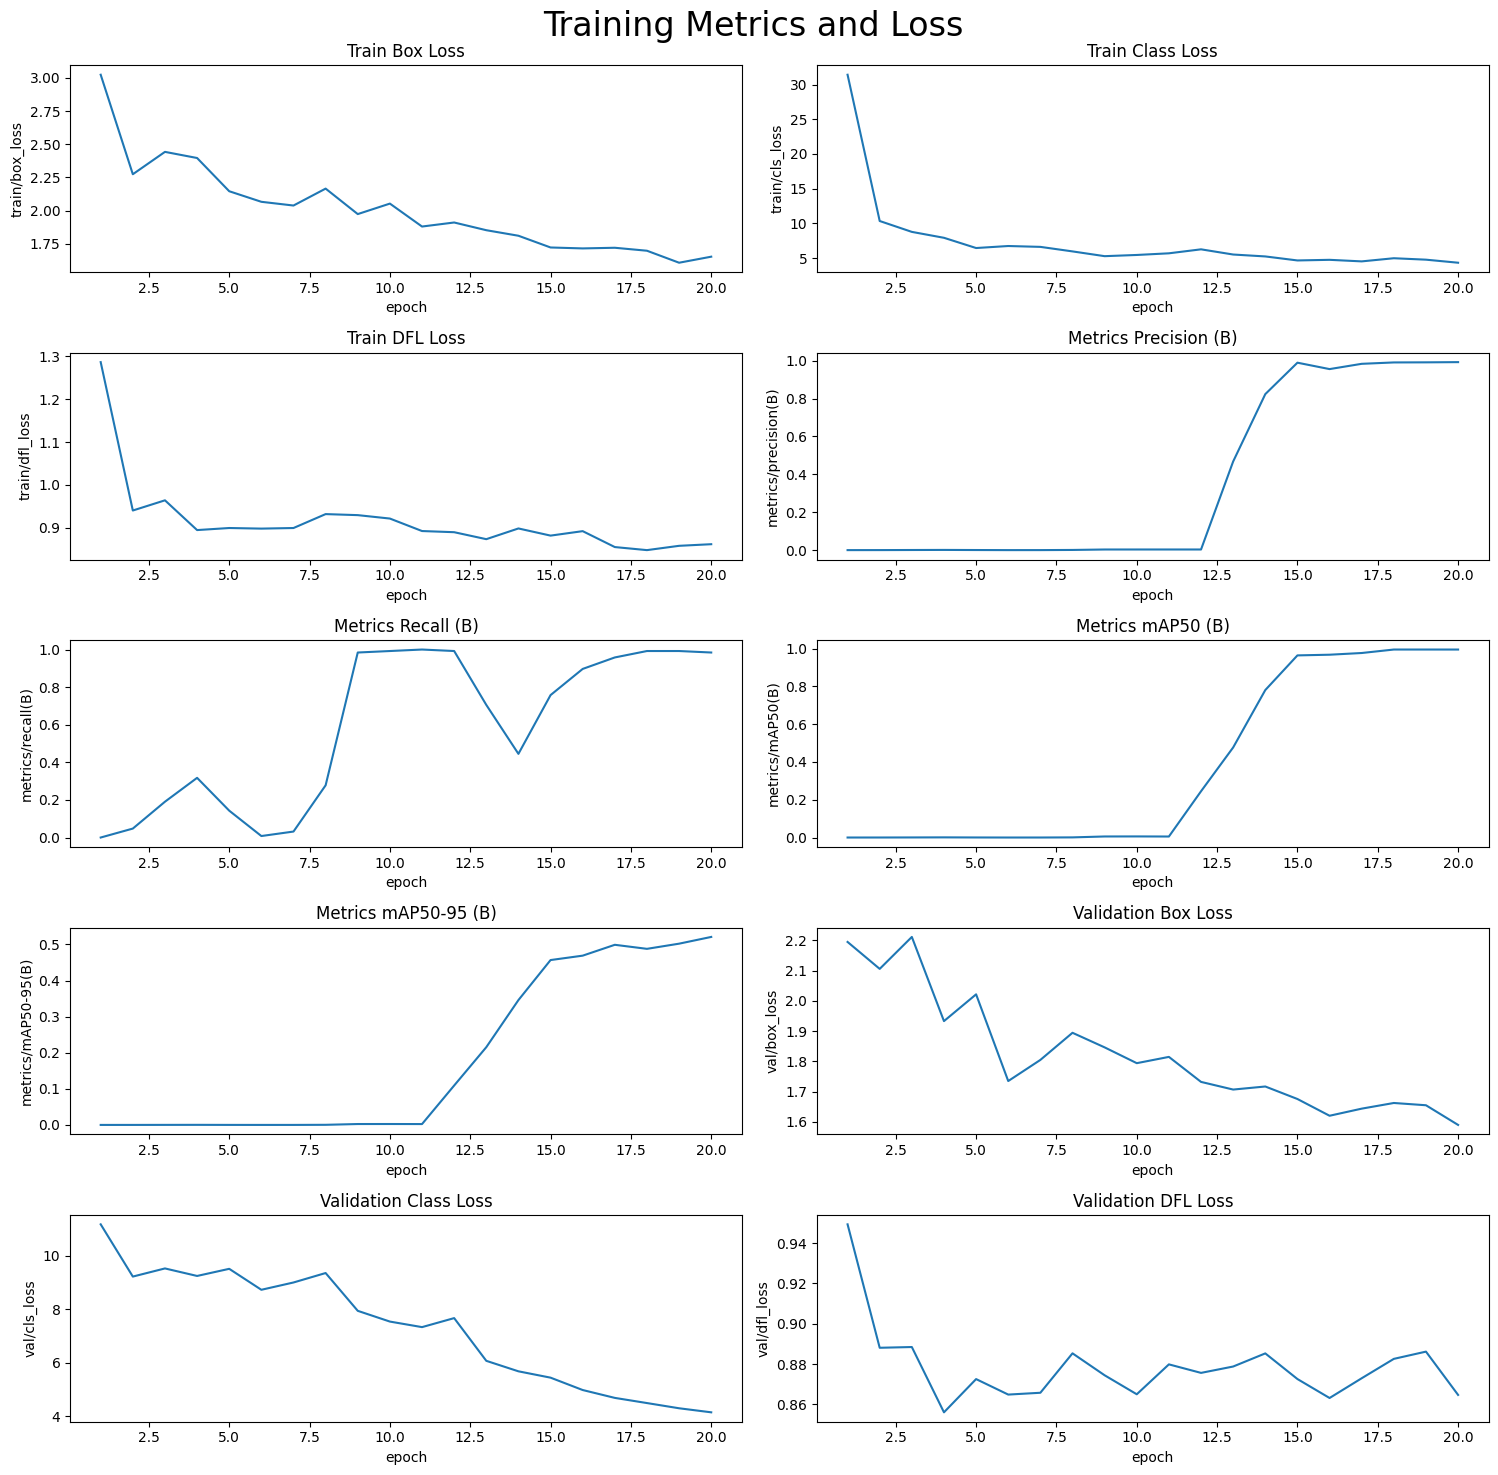

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read in the results.csv file as a pandas dataframe
df = pd.read_csv('runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

## Test

In [4]:
model = YOLO('runs/detect/train/weights/best.pt') 

vid = cv2.VideoCapture(vid_path)
fps = vid.get(cv2.CAP_PROP_FPS)
frame_interval = int(1000/fps) # milliseconds
frame_number = 0

if not vid.isOpened():
    print("Error: Could not open video.")
    exit()

ret, frame = vid.read()
while ret:
    frame_number += 1
    
    # Run YOLO detection
    results = model.predict(frame, conf=0.2, verbose=False)
    
    # Draw bounding boxes on the frame
    annotated_frame = results[0].plot()
    cv2.imshow("Nametag Detection", annotated_frame)

    # Print out frame number & x,y coordinate of the name tag 
    boxes = results[0].boxes
    if len(boxes) > 0:  # If detections exist
        print(f"\nFrame {frame_number}:")
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)
            print(f"  Nametag {i+1}: Center at ({center_x}, {center_y})")
            print(f"           Bounding box: [{int(x1)}, {int(y1)}, {int(x2)}, {int(y2)}]")
            print(f"           Confidence: {box.conf[0]:.2f}")

    ret, frame = vid.read()
    if cv2.waitKey(frame_interval) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()


Frame 130:
  Nametag 1: Center at (386, 44)
           Bounding box: [377, 37, 395, 51]
           Confidence: 0.35

Frame 131:
  Nametag 1: Center at (387, 33)
           Bounding box: [377, 26, 396, 40]
           Confidence: 0.23

Frame 377:
  Nametag 1: Center at (515, 43)
           Bounding box: [507, 37, 524, 49]
           Confidence: 0.23

Frame 378:
  Nametag 1: Center at (519, 42)
           Bounding box: [511, 36, 527, 47]
           Confidence: 0.52

Frame 379:
  Nametag 1: Center at (525, 45)
           Bounding box: [515, 39, 535, 52]
           Confidence: 0.56

Frame 380:
  Nametag 1: Center at (529, 50)
           Bounding box: [518, 43, 540, 57]
           Confidence: 0.47

Frame 381:
  Nametag 1: Center at (534, 57)
           Bounding box: [523, 50, 545, 64]
           Confidence: 0.53

Frame 382:
  Nametag 1: Center at (541, 67)
           Bounding box: [530, 60, 552, 74]
           Confidence: 0.39

Frame 383:
  Nametag 1: Center at (544, 75)
           Bounding